# MIPT Data Science, домашнее задание 3

**Автор:** Миленькин Александр

**Решил:** Дмитрий Кочетков

In [16]:
import numpy as np
import pandas as pd

import scipy

import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

In [17]:
data = pd.read_csv("people_data_clustering.csv", index_col=0)
print("Размеры датасета", data.shape)
data.head()

Размеры датасета (6000, 9)


,was_married,children,salary,sex,age,profession,home_cost,drive_info,happyness
id,,,,,,,,,
0,1,4.0,4.420530e+07,1,82.0,Engineer,1.003674e+07,NaN,0.727499
1,1,2.0,1.737490e+08,1,32.0,Doctor,1.014051e+07,0.0,0.383234
2,1,6.0,2.489055e+08,1,14.0,Entertainment,1.043318e+07,NaN,0.432142
3,0,1.0,1.268718e+08,0,10.0,Lawyer,1.004299e+07,NaN,0.377987
4,1,9.0,8.596042e+07,1,99.0,Artist,1.021908e+07,NaN,0.657579


<div class="alert alert-info">
<b>Про Датасет</b>
    
Датасет представляет собой информацию по жителям некоторого города.

* `was_married` - Был ли когда-либо женат/замужем
* `children` - Количество детей
* `salary` - Уровень зарплаты
* `sex` - Пол (0 - женщина, 1 - мужчина)
* `age` - Возраст
* `home_cost` - Сумарная стоимость жилья/недвижимости
* `Professon` - Профессия
* `drive_info` - Есть ли водительские права
* `happyness` - уровень счастья по результатам опроса
    
</div>

<div class="alert alert-info">
<b>Задание</b>

Изучить датасет и, используя класстерный анализ, разбить пользователей на сегменты. Сделать выводы о причинах такой кластеризации.

# Чистка датасета (5 баллов)
* Есть ли дубли в данных? Если есть удалить.
* Найти и удалить выбросы по признаку `home_cost`. (Их не больше 15-х, не меньше 3-х)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 499
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   was_married  6000 non-null   int64  
 1   children     6000 non-null   float64
 2   salary       6000 non-null   float64
 3   sex          6000 non-null   int64  
 4   age          6000 non-null   float64
 5   profession   6000 non-null   object 
 6   home_cost    6000 non-null   float64
 7   drive_info   3230 non-null   float64
 8   happyness    6000 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 468.8+ KB


In [19]:
print('NaN count:')
data.isna().sum()

NaN count:


was_married       0
children          0
salary            0
sex               0
age               0
profession        0
home_cost         0
drive_info     2770
happyness         0
dtype: int64

In [20]:
data['drive_info'].unique()

array([nan,  0.,  1.])

In [21]:
data = data.fillna(0.)
data

,was_married,children,salary,sex,age,profession,home_cost,drive_info,happyness
id,,,,,,,,,
0,1,4.0,4.420530e+07,1,82.0,Engineer,1.003674e+07,0.0,0.727499
1,1,2.0,1.737490e+08,1,32.0,Doctor,1.014051e+07,0.0,0.383234
2,1,6.0,2.489055e+08,1,14.0,Entertainment,1.043318e+07,0.0,0.432142
3,0,1.0,1.268718e+08,0,10.0,Lawyer,1.004299e+07,0.0,0.377987
4,1,9.0,8.596042e+07,1,99.0,Artist,1.021908e+07,0.0,0.657579
...,...,...,...,...,...,...,...,...,...
495,1,0.0,3.589436e+07,1,3.0,Executive,1.007038e+07,1.0,0.599222
496,1,3.0,2.454208e+06,0,20.0,Homemaker,1.009348e+07,1.0,0.259710
497,1,0.0,3.335405e+06,0,17.0,Healthcare,1.016696e+07,0.0,0.258779


<AxesSubplot:>

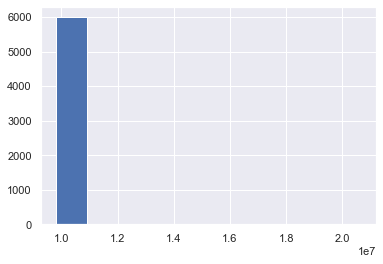

In [22]:
data['home_cost'].hist()

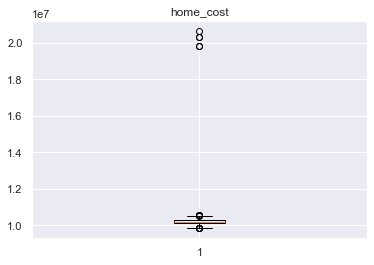

In [23]:
# Смотрим на выбросы в home_cost

plt.boxplot(data['home_cost'])
plt.title('home_cost')
plt.show()

In [24]:
# Выбросы

data[data['home_cost'] > 1.8 * 1e7]

,was_married,children,salary,sex,age,profession,home_cost,drive_info,happyness
id,,,,,,,,,
1140,1,4.0,2.979682e+07,1,82.0,Engineer,2.032128e+07,1.0,0.442221
1779,1,3.0,2.101892e+06,0,20.0,Homemaker,2.031197e+07,1.0,0.276563
3307,1,0.0,2.482825e+07,1,3.0,Executive,1.979488e+07,1.0,0.476812
3380,1,0.0,3.289744e+07,1,3.0,Executive,1.979532e+07,0.0,0.322794
4727,1,1.0,1.368018e+07,1,9.0,Marketing,2.065792e+07,1.0,0.417330


In [25]:
# Удаляем слишком большие выбросы 
data = data[data['home_cost'] <= 1.8 * 1e7]

In [26]:
data.shape # удалено 5 выбросов

(5995, 9)

<AxesSubplot:>

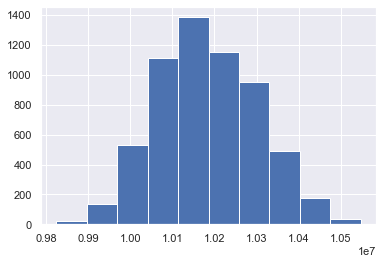

In [27]:
data['home_cost'].hist()

# Проверка гипотез (15 баллов)

<div class="alert alert-info">

<b>Описание заданий раздела:</b>    
    
В этом разделе вам предстоит:
* Проверить предложенные утверждения визуально.
* Применить подходящий статистический критерий, чтобы окончательно доказать или опровергнуть гипотезы на основе этих данных.

In [53]:
from scipy import stats

<div class="alert alert-warning">
    
* Правда ли женщины в среднем имеют более высокую зарплату, чем мужчины?

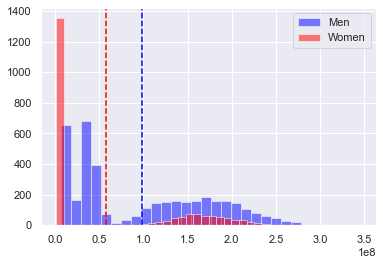

In [65]:
men_salaries = data['salary'][data['sex'] == 1]
women_salaries = data['salary'][data['sex'] == 0]

plt.hist(men_salaries, bins=30, label="men", color="blue", alpha=0.5)
plt.hist(women_salaries, bins=30, label="women", color="red", alpha=0.5)
plt.legend(["Men", "Women"])
plt.axvline(men_salaries.mean(), color="blue", linestyle='dashed')
plt.axvline(women_salaries.mean(), color="red", linestyle='dashed')
plt.show()

Видим, что распределение не нормальное. Используем критерий Манна-Уитни.

Нулевая гипотеза: Зарплата женщин распределена также, как и зарплата мужчин.

In [52]:
alpha = 0.05

results = stats.mannwhitneyu(men_salaries, women_salaries)
print('p-value: {}'.format(results.pvalue))

p-value: 1.0692585340727922e-216


p-value меньше 0.05, поэтому отвергаем нулевую гипотезу. Делаем вывод, что мужчины в среднем имеют более высокую зарплату, чем женщины.

<div class="alert alert-warning">
    
* Правда ли, что инженеры (Engineer) зарабатывают в среднем больше, чем люди из сферы развлечений (Entertainment)?

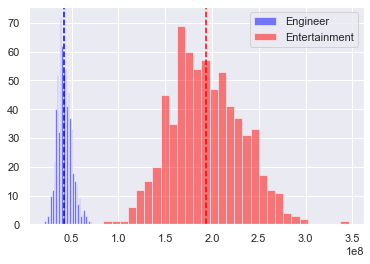

In [66]:
engineer_salaries = data['salary'][data['profession'] == 'Engineer']
entertainment_salaries = data['salary'][data['profession'] == 'Entertainment']

plt.hist(engineer_salaries, bins=30, color="blue", alpha=0.5)
plt.hist(entertainment_salaries, bins=30, color="red", alpha=0.5)
plt.legend(["Engineer", "Entertainment"])
plt.axvline(engineer_salaries.mean(), color="blue", linestyle='dashed')
plt.axvline(entertainment_salaries.mean(), color="red", linestyle='dashed')
plt.show()

Распределение напоминает нормальное. Тем не менее, видим, что дисперсии не равные. Применяем t-критерий Стьюдента без предположения о равенстве дисперсий.

In [68]:
result = stats.ttest_ind(engineer_salaries, entertainment_salaries, equal_var=False)

result.pvalue

1.3940777684226444e-120

Отвергаем нулевую гипотезу. Вывод: работники сферы развлечений получают в среднем больше, чем инженеры.

<div class="alert alert-warning">
    
* Правда ли, что те, у кого больше трех детей зарабатывают в среднем больше, чем те, у кого меньше или трое детей?

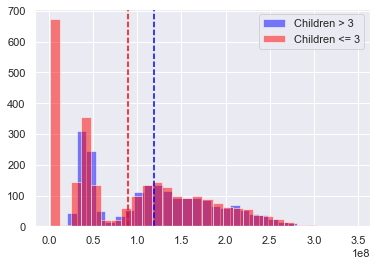

In [72]:
more_than_three_children_salaries = data['salary'][data['children'] > 3]
less_than_three_children_salaries = data['salary'][data['children'] >= 3]

plt.hist(more_than_three_children_salaries, bins=30, color="blue", alpha=0.5)
plt.hist(less_than_three_children_salaries, bins=30, color="red", alpha=0.5)
plt.legend(["Children > 3", "Children <= 3"])
plt.axvline(more_than_three_children_salaries.mean(), color="blue", linestyle='dashed')
plt.axvline(less_than_three_children_salaries.mean(), color="red", linestyle='dashed')
plt.show()

Распределения не нормальные. Используем критерий Манна-Уитни.

In [73]:
resuls = stats.mannwhitneyu(more_than_three_children_salaries, less_than_three_children_salaries)

resuls.pvalue

2.337372654822451e-49

Отвергаем нулевую гипотезу. Вывод: люди, у которых больше трех детей, зарабатывают в среднем больше тех, у кого меньше или трое детей.

<div class="alert alert-warning">
    
* Правда ли, что дома художники (Artist) живут в домах, которые в среднем дороже или дешевле, чем дома адвокатов (Lawyer)?

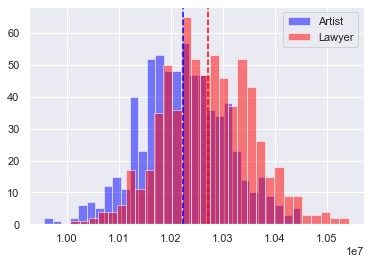

In [76]:
artist_home_cost = data['home_cost'][data['profession'] == 'Artist']
lawyer_home_cost = data['home_cost'][data['profession'] == 'Lawyer']

plt.hist(artist_home_cost, bins=30, color="blue", alpha=0.5)
plt.hist(lawyer_home_cost, bins=30, color="red", alpha=0.5)
plt.legend(["Artist", "Lawyer"])
plt.axvline(artist_home_cost.mean(), color="blue", linestyle='dashed')
plt.axvline(lawyer_home_cost.mean(), color="red", linestyle='dashed')
plt.show()

Распределения не совсем напоминают нормальные. Используем критерий Манна-Уитни.

In [77]:
results = stats.mannwhitneyu(artist_home_cost, lawyer_home_cost)

results.pvalue

3.108625797769086e-23

Отвергаем нулевую гипотезу. Вывод: адвокаты живут в среднем в более дорогих домах, чем художники.

<div class="alert alert-warning">
    
* Правда ли, что недвижимость у бывавших в браке в среднем дороже, чем у не бывавших в браке?

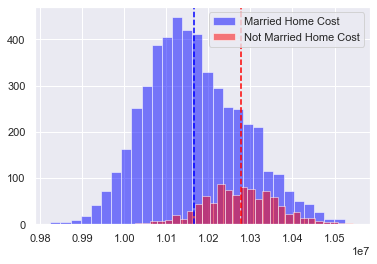

In [83]:
married_home_cost = data['home_cost'][data['was_married'] == 1]
not_married_home_cost = data['home_cost'][data['was_married'] == 0]

plt.hist(married_home_cost, bins=30, color="blue", alpha=0.5)
plt.hist(not_married_home_cost, bins=30, color="red", alpha=0.5)
plt.legend(["Married Home Cost", "Not Married Home Cost"])
plt.axvline(married_home_cost.mean(), color="blue", linestyle='dashed')
plt.axvline(not_married_home_cost.mean(), color="red", linestyle='dashed')
plt.show()

Распределения отдаленно напоминают нормальные. Проверим равенство дисперсий.

In [84]:
results = stats.fligner(married_home_cost, not_married_home_cost)
print(results)

1.705172020252615e-23


Дисперсии не равны. Применяем критерий Стьюдента без предположения о равенстве дисперсий.

In [86]:
results = stats.ttest_ind(married_home_cost, not_married_home_cost, equal_var=False)
results.pvalue

9.515520773429621e-195

Отвергаем нулевую гипотезу. Выыод: недвижимость у бывавших в браке в среднем дороже, чем у не бывавших в браке.

<div class="alert alert-warning">
    
* Правда ли, что мужчины в среднем чаще бывают в браке, чем женщины?

Воспользуемся критерием хи-квадрат на таблице сопряженности.

In [88]:
contingency_table = pd.crosstab(data['sex'], data['was_married'])
results = stats.chi2_contingency(contingency_table)

pvalue = results[1]
pvalue

3.97625859922564e-150

In [87]:
contingency_table

was_married,0,1
sex,,
0,670,1358
1,278,3689


Отвергаем нулевую гипотезу. Мужчины в среднем чаще бывают в браке, чем женщины.

# Гипотезы при множественном тестировании (10 баллов)

In [ ]:
# Подсказка: 
# - дисперсионнай анализ  f_oneway()
# - Крускал Уоллиса

<div class="alert alert-warning">
    
* Правда ли между представителями таких профессий как, **Homemaker**, **Marketing**, **Healthcare** и **Executive** в среднем  зарплаты не отличаются между собой? Ответ подкрепите визуализацией и подходящим статистическим критерием. 

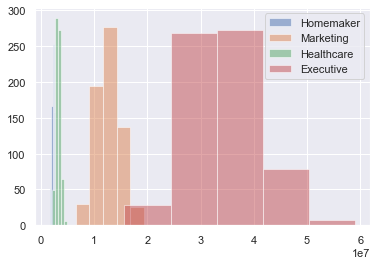

In [118]:
professions = ["Homemaker", "Marketing", "Healthcare", "Executive"]
data_grouped_by_professions = list()

for profession in professions:
    plt.hist(data[data["profession"] == profession]['salary'], alpha=0.5, bins=5)
    data_grouped_by_professions.append(data[data["profession"] == profession]['salary'])

plt.legend(professions)
plt.show()

Судя по гистограмме зарплаты отличаются довольно сильно. Применим статистичекий тест.

In [123]:
results = stats.f_oneway(*data_grouped_by_professions)

pvalue = results[1]
pvalue

0.0

Стат. тест только подтвердил наши наблюдения - зарплаты в среднем отличаются очень сильно.

<div class="alert alert-warning">
    
* Правда ли между представителями таких профессий как, **Doctor**, **Entertainment** и **Lawyer** в среднем  зарплаты не отличаются между собой? Ответ подкрепите визуализацией и подходящим статистическим критерием. 

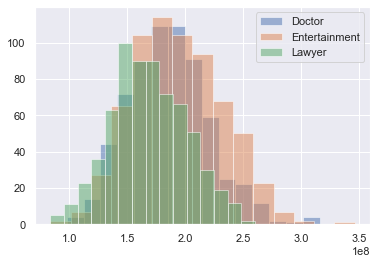

In [128]:
professions = ["Doctor", "Entertainment", "Lawyer"]
data_grouped_by_professions = list()

for profession in professions:
    plt.hist(data[data["profession"] == profession]['salary'], alpha=0.5, bins=15)
    data_grouped_by_professions.append(data[data["profession"] == profession]['salary'])

plt.legend(professions)
plt.show()

In [129]:
results = stats.f_oneway(*data_grouped_by_professions)

pvalue = results[1]
pvalue

5.67666591800931e-38

# Регрессионный Анализ (20 баллов)

Взглянем от чего зависит уровень счастья

In [ ]:
import statsmodels.formula.api as smf

# Рекомендации: 
# Используйте библиотку statsmodels для оценки вклада каждого фактора
# Выведения отчета о модели - model.summary()

<div class="alert alert-warning">
    
Выполните следующие задания и на основе результатов ответьте на вопросы:

* Постройте регрессионную модель зависимости уровня счастья от приведенных факторов (was_married, children, salary, sex, age, home_cost)
* Существует ли связь между уровнем счастья и зарплатой?

* Насколько сильны эти отношения?

* Как факт брака способствуют стоимости недвижимости?

* Зная влияние каждого фактора, можем ли мы предсказать уровень счастья?

* Постройте график зависимостей целевой переменной от приведенных числовых факторов. 
    
* Какие признаки не влияют на уровень счастья? (стат. значимость)
    
* Какой признак самый сильный?
    
* Постройте график остатков. Всю ли информацию смогла извлечь ваша модель из данных?

* Наблюдается ли гетероскедастичность в остатках?
    
* Есть ли в данных автокоррелированность?  

In [131]:
import seaborn as sns

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


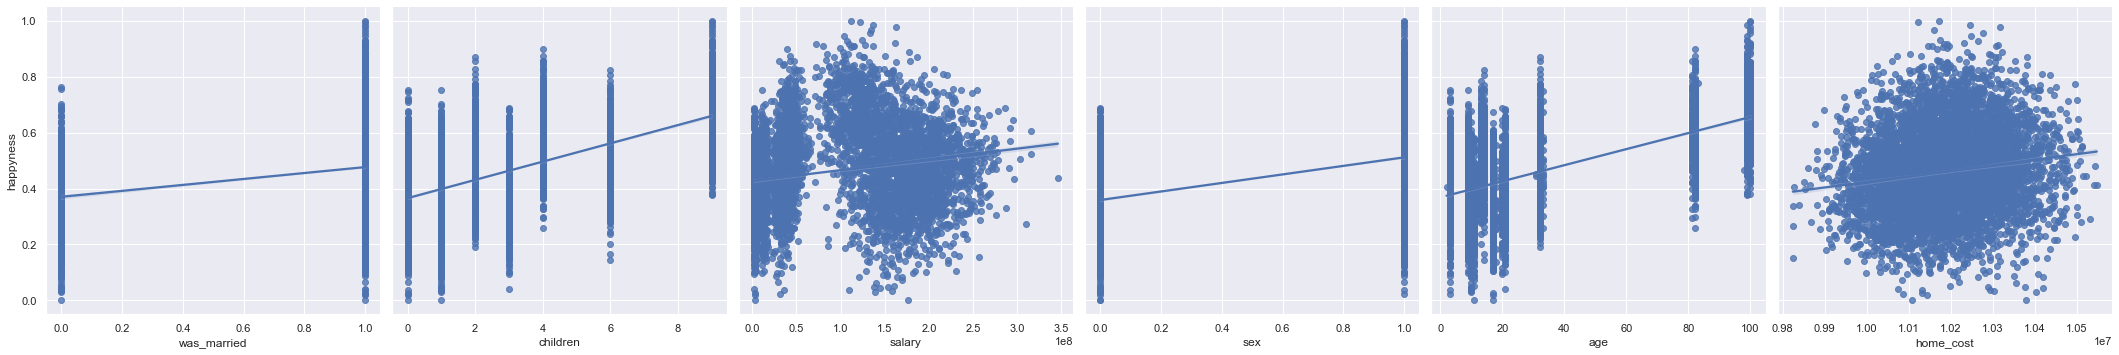

In [133]:
sns.pairplot(data, x_vars=['was_married', 'children', 'salary', 'sex', 'age', 'home_cost'], y_vars='happyness', size=5, kind='reg')

# Дополнительные баллы (+10 баллов)
* Аккуратный и понятный код **+5 баллов**
* Присутствуют лаконичные и понятные комментарии **+5 балов**